#             Heart Failure Data analysis ...


# Some terms needed to be rememberd in this analysis:

# Step 1: Data preparation and cleaning 

so here we will do some following this in this step :


In [2]:
#import the required basic libraries to access the functions from it 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading the dataset in a variable and printing to view it 

var=pd.read_csv('heart.csv')
var

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
#here we just showing off how many columns are there in the dataset and its count 

print("The number of the columns present are : ",var.shape[1],"\n")

list(var.columns)# this gives the columns 

The number of the columns present are :  12 



['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [5]:
#if we want to count the number of row's in our dataset then 

print("The count of rows is :",len(var)) 

The count of rows is : 918


In [6]:
#Or Otherwise to not make things complex we can use the below syntax where we can get all the infirmation at once

print(var.info()) #This give's the complete info about the datset at once 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [7]:
#This is a function wich is used to give the overview of some mathematical  colummns & concepts which are present in the dataset 

var.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
#so here we have got the count of the numeric columns which are present in the dataset whicg are present 

num=var.select_dtypes(include=['int','float'])
print("The count of numeric columns in the datase are :",len(num.columns))

The count of numeric columns in the datase are : 7


In [9]:
var.corr(method='pearson')

C:\Users\nvsri\AppData\Local\Temp\ipykernel_17104\1673483739.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  var.corr(method='pearson')


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [10]:
#The below is the syntax for checking the missing values of the dataset where if there is any value missing in the column

# The percentage of the missing numbers from the highest number to lowest number 


missing_percentages=var.isnull().sum().sort_values(ascending=False) /len(var)
missing_percentages


#so here we have calculated the missing value perecntage and we have given them an descending order 

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [11]:
#now let us check for the duplicate's which are present in the dataset 

duplicates=var.duplicated().sum()

if(duplicates==0):
    print("There are no duplicates in this dataset")
    
else:
    print("The number of the duplicates are :",duplicates)
    var = var.drop_duplicates(keep='first')
    print("Duplicates have been dropped.")
    
    
#Note:This cell should be runned only for one time 

There are no duplicates in this dataset


In [12]:
var

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [13]:
#let us find the unique values in the sex,chestpain_type columns and in resting ECG column

sex_Unique_count=var['Sex'].unique()
chestpain_unique_count=var['ChestPainType'].unique()
resting_unique_count=var['RestingECG'].unique()


In [14]:
#unique values present in the sex column
sex_Unique_count

array(['M', 'F'], dtype=object)

In [15]:
#unique values present in the chestpain column
chestpain_unique_count

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [16]:
#unique values present in the restingecg column
resting_unique_count

array(['Normal', 'ST', 'LVH'], dtype=object)

In [17]:
#now let us convert these names into the numerics
#let us create a function for time beign and inlude it in the dataset 

def Sex_column_to_num(x):
    if x=='M':return 1
    if x=='F':return 2

In [18]:
#now let us apply the function to the above column 

var['Sex']=var['Sex'].apply(Sex_column_to_num)

#so now the male letter will be represented as 1 
#female will be addressed as 2

#so this is one of the way of converting the object values into numeric form

In [19]:
var

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,2,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,2,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,2,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Visualization 

<Axes: xlabel='ChestPainType', ylabel='HeartDisease'>

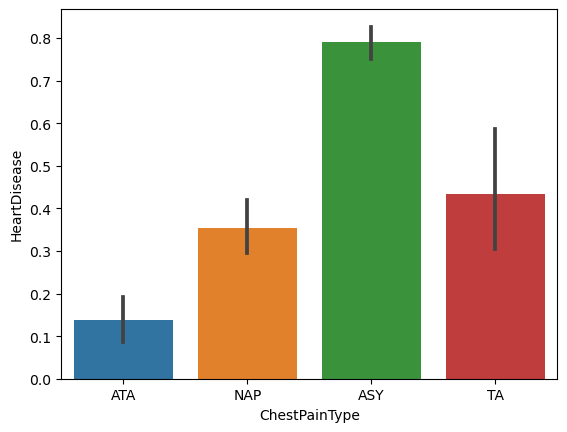

In [20]:
#based on the chest pain type we have seen the chances of the getting the heart attack 

sns.barplot(data=var,x='ChestPainType',y='HeartDisease')

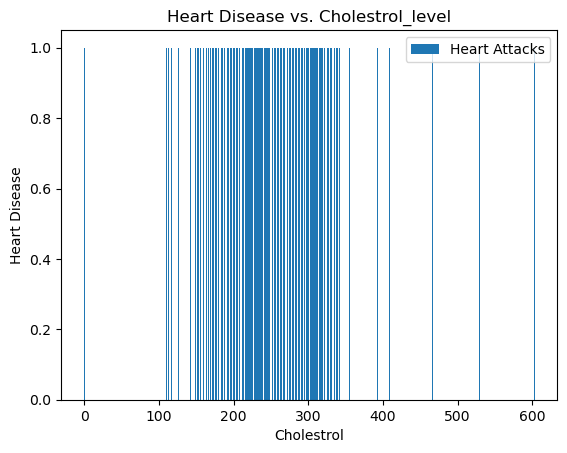

In [21]:
# Plotting using matplotlib

# so here based on the level of cholestrol we can see the chances of acquring the heart attacks 

plt.bar(var['Cholesterol'], var['HeartDisease'], label='Heart Attacks')
plt.xlabel('Cholestrol')
plt.ylabel('Heart Disease')
plt.title('Heart Disease vs. Cholestrol_level')
plt.legend()
plt.show()

In [22]:
var.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

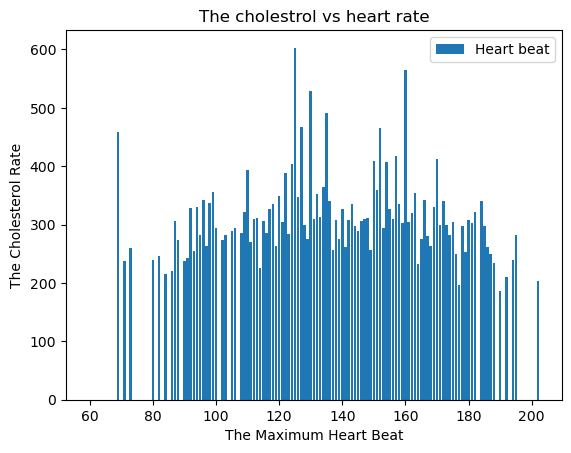

In [23]:
#now let us draw a plot HR vs cholestrol

x=var['MaxHR']
y=var['Cholesterol']

plt.bar(x,y,label='Heart beat')
plt.xlabel('The Maximum Heart Beat')
plt.ylabel('The Cholesterol Rate')
plt.title('The cholestrol vs heart rate')
plt.legend()
plt.show()

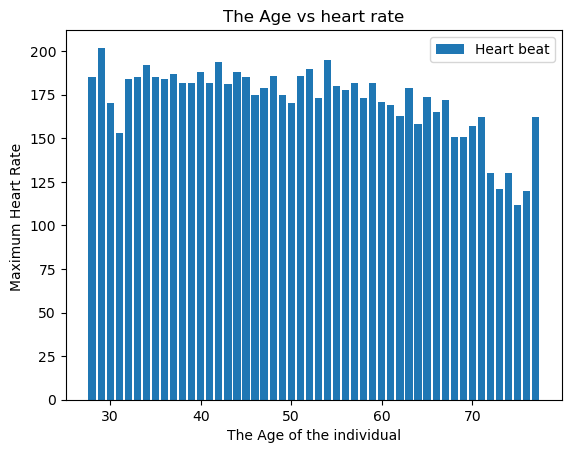

In [24]:

x=var['Age']
y=var['MaxHR']

plt.bar(x,y,label='Heart beat')
plt.xlabel('The Age of the individual')
plt.ylabel('Maximum Heart Rate ')
plt.title('The Age vs heart rate')
plt.legend()
plt.show()

<Axes: xlabel='ExerciseAngina', ylabel='HeartDisease'>

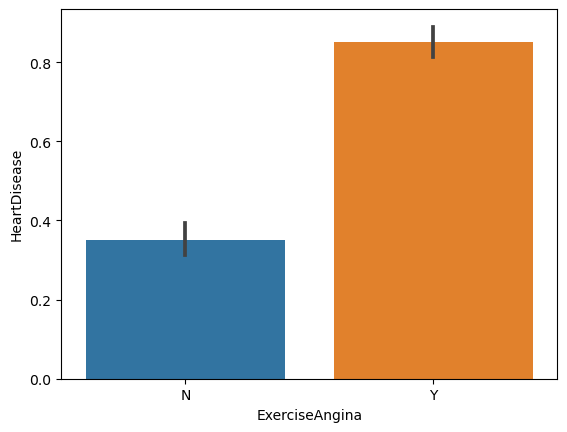

In [25]:
#so here we have drawn the plot between the candidates who has exerciseangina can be attacked by heart disease and
#we can see the result in the heart beat 

sns.barplot(data=var,x='ExerciseAngina',y='HeartDisease')

In [26]:
#now let us see the highest heart attacks occured at which age

highest_heart_attacks = var.loc[var['HeartDisease'].idxmax(), 'Age']

print('so the highest and reugular amount of people effected with heart disease at the age :',highest_heart_attacks)

so the highest and reugular amount of people effected with heart disease at the age : 49


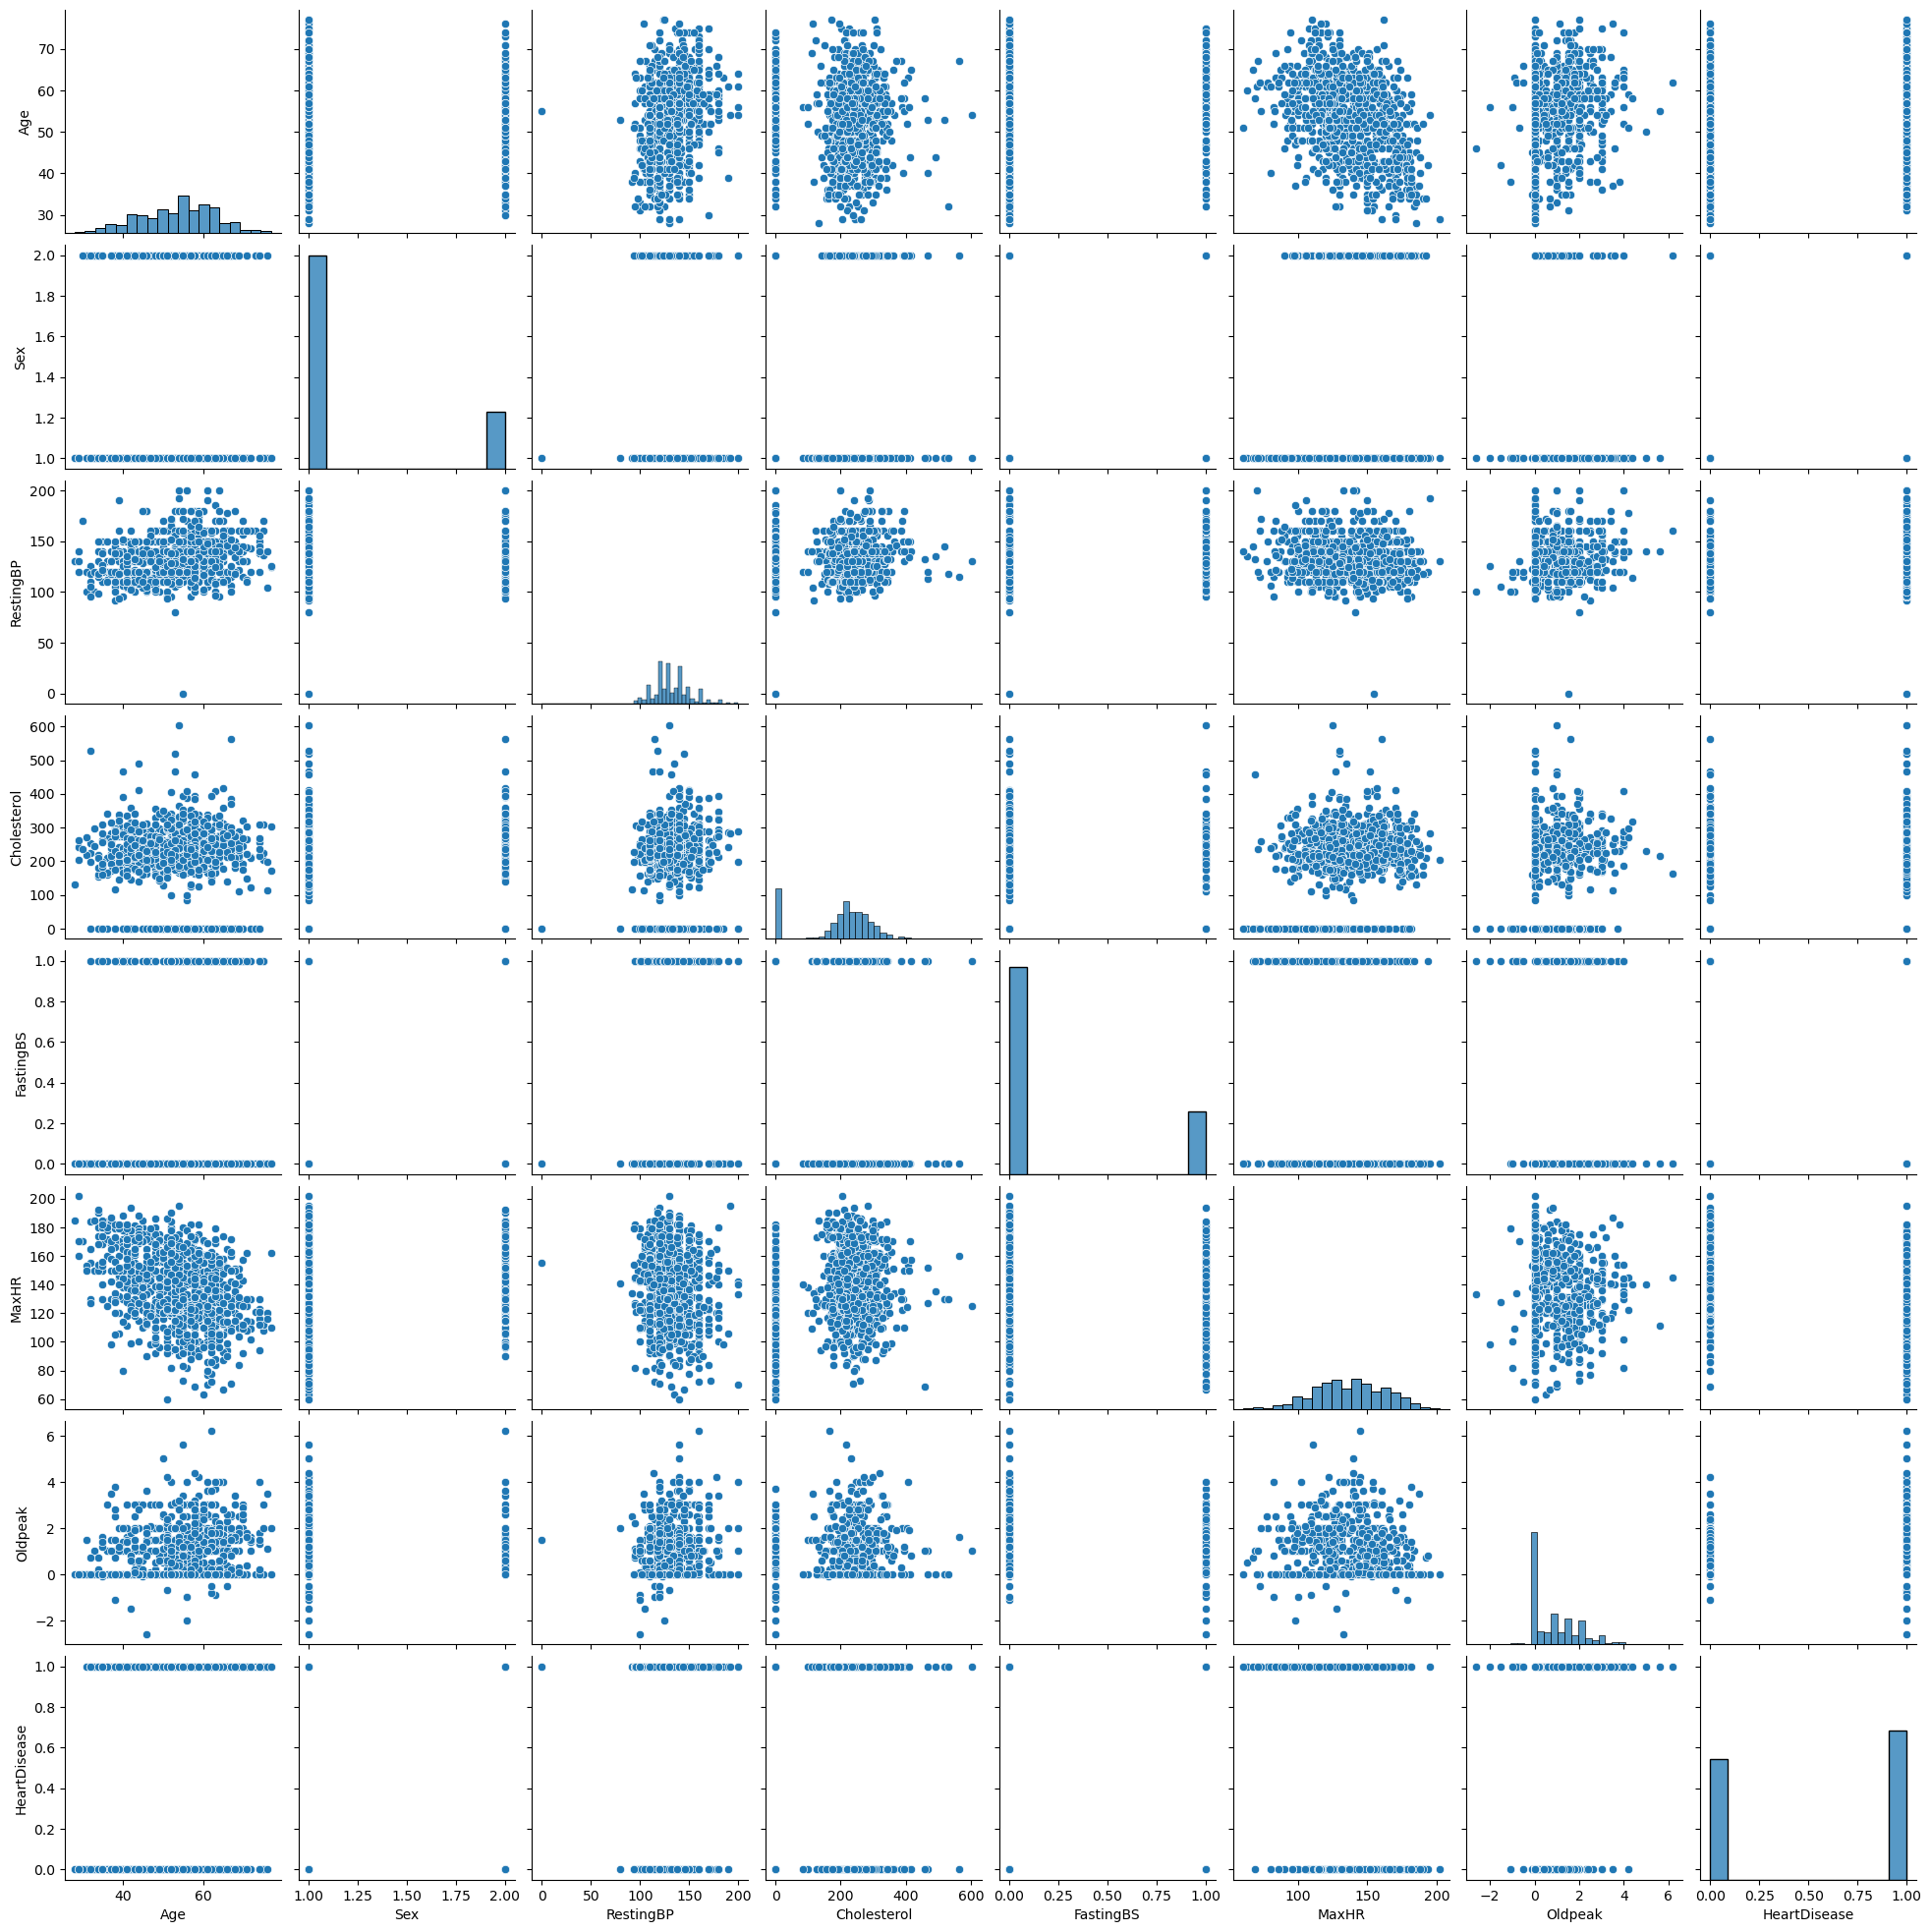

In [27]:
#so now let us draw some pairplots and visualize them 

# so what does this pair plots does are describes the realtion ship between the one column and each and every column same goes 
#with vice versa 

sns.pairplot(var)

<Axes: xlabel='Age'>

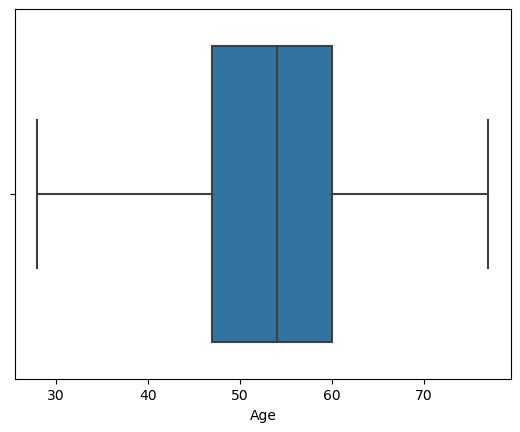

In [28]:
#check for the abnormal values which are present 

sns.boxplot(data=var,x='Age')

In [29]:
var.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

<Axes: xlabel='RestingBP'>

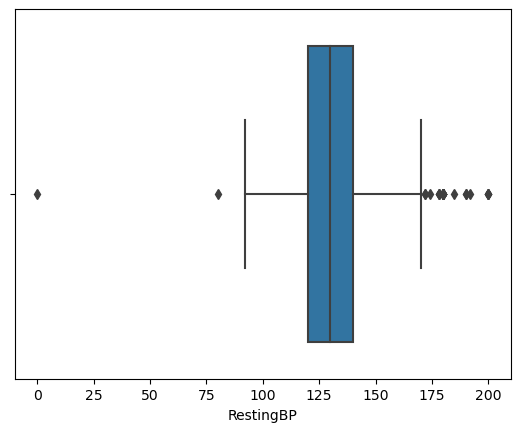

In [30]:
#so we are checking for the abnormal values which are present in the column RestingBp

#so to remove this we need to outlier technique 

sns.boxplot(data=var,x='RestingBP')

<Axes: xlabel='Oldpeak'>

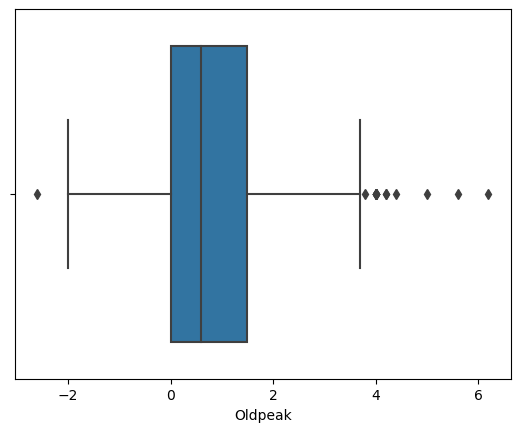

In [31]:
#so this used to check the 

sns.boxplot(data=var,x='Oldpeak')

<Axes: xlabel='Cholesterol'>

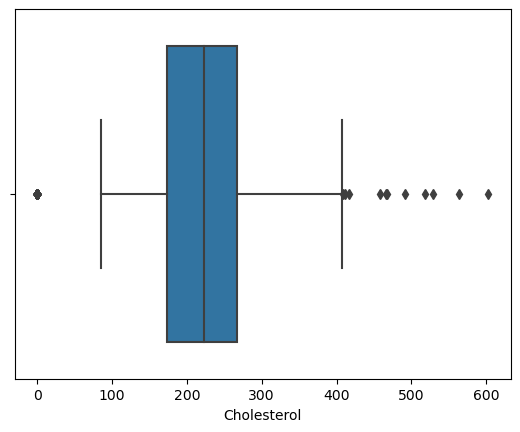

In [32]:
#so this is the boxplot for the cholsetrol and the abnormalities of the data is as followos so we need to do nothing just 
#we need to remove them 
sns.boxplot(data=var,x='Cholesterol')

# Outlier Removal  

In [33]:
#outlier REMOVAL 

var1=var.sort_values('Cholesterol')
var1.tail() 

#last five rows 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
250,44,1,ASY,135,491,0,Normal,135,N,0.0,Flat,1
30,53,1,NAP,145,518,0,Normal,130,N,0.0,Flat,1
76,32,1,ASY,118,529,0,Normal,130,N,0.0,Flat,1
616,67,2,NAP,115,564,0,LVH,160,N,1.6,Flat,0
149,54,1,ASY,130,603,1,Normal,125,Y,1.0,Flat,1


In [34]:
var1.head()
#first five rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
458,61,1,ASY,134,0,1,ST,86,N,1.5,Flat,1
369,63,1,ASY,150,0,0,Normal,86,Y,2.0,Flat,1
368,57,1,ASY,140,0,0,Normal,120,Y,2.0,Flat,1
367,68,1,ASY,135,0,0,ST,120,Y,0.0,Up,1
366,61,1,ASY,150,0,0,Normal,117,Y,2.0,Flat,1


In [35]:
#we will remove the outliers using the inter quartile range method (IQR)

#formulae : IQR = Q3-Q1

q3=var['Cholesterol'].quantile(0.75)
print("The value of the q3 is :",q3)



The value of the q3 is : 267.0


In [36]:
q1=var['Cholesterol'].quantile(0.25)
print("The value of the q1 is :",q1)

The value of the q1 is : 173.25


In [37]:
#here in this cell we are calcuating the value of the iqr 

iqr=q3-q1

print("The IQR is :",iqr)


The IQR is : 93.75


In [38]:
#now let us calculate the upperlimit and the lower limit 

ul=q3+(1.5*iqr) #this is the upperlimit

ll=q1-(1.5*iqr) #this is the lowerlimit 

print("The value of the upper limit  is :",ul)
print("The value of the lower limit is :",ll)

The value of the upper limit  is : 407.625
The value of the lower limit is : 32.625


In [39]:
#calculating the upper bound and the lower bound values 

upper=np.where(var['Cholesterol']>=ul)

In [40]:
lower=np.where(var['Cholesterol']<=ll)

In [41]:
#remove the upperlimit and the lower limit 

var.drop(upper[0],inplace=True)
var.drop(lower[0],inplace=True)

<Axes: xlabel='Cholesterol'>

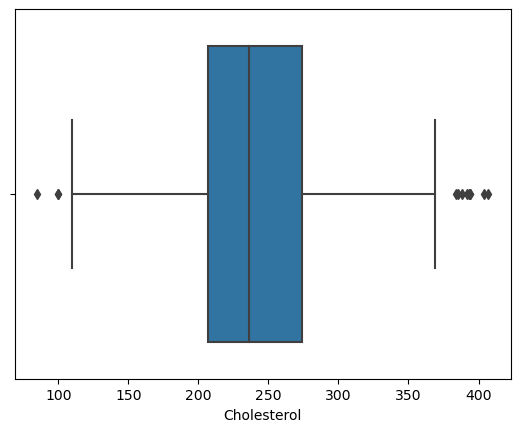

In [42]:
sns.boxplot(data=var,x='Cholesterol')

In [43]:
q3=var['Cholesterol'].quantile(0.75)
print("The value of the q3 is :",q3)

The value of the q3 is : 274.0


In [44]:
q1=var['Cholesterol'].quantile(0.25)
print("The value of the q1 is :",q1)

The value of the q1 is : 207.0


In [45]:
iqr=q3-q1

print("The IQR is :",iqr)

The IQR is : 67.0


In [46]:

ul=q3+(1.5*iqr) #this is the upperlimit

ll=q1-(1.5*iqr) #this is the lowerlimit 

print("The value of the upper limit  is :",ul)
print("The value of the lower limit is :",ll)

The value of the upper limit  is : 374.5
The value of the lower limit is : 106.5


In [47]:

upper1=np.where(var['Cholesterol']>=ul)

In [48]:
lower1=np.where(var['Cholesterol']<=ll)

In [49]:
# Calculate Z-score
z_scores = (var['Cholesterol'] - var['Cholesterol'].mean()) / var['Cholesterol'].std()

# Define threshold for outlier removal (e.g., Z-score > 3 or < -3)
outlier_threshold = 3

# Identify outliers
outliers = var[z_scores.abs() > outlier_threshold]

# Remove outliers
var = var[z_scores.abs() <= outlier_threshold]


<Axes: xlabel='Cholesterol'>

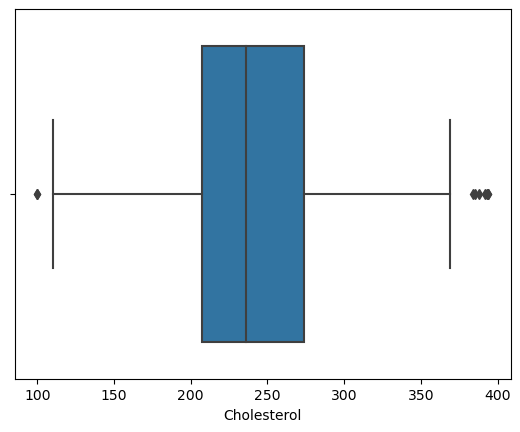

In [50]:
sns.boxplot(data=var,x='Cholesterol')

In [51]:
var.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

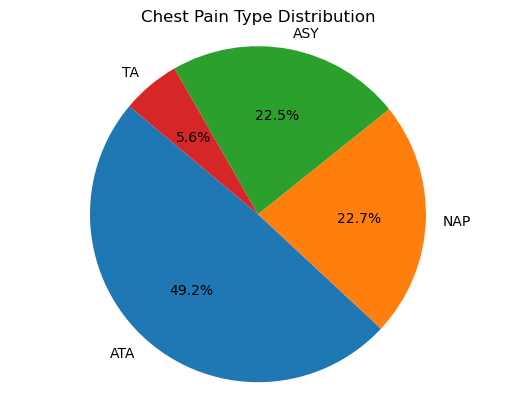

In [52]:
# so this pie chart resembels that which type of the chestpain can cause the heart attcaks and disease 
labels = ['ATA', 'NAP', 'ASY', 'TA']
counts = var['ChestPainType'].value_counts()  # Replace these values with your actual counts

# Plotting the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.


plt.title('Chest Pain Type Distribution')
plt.show()


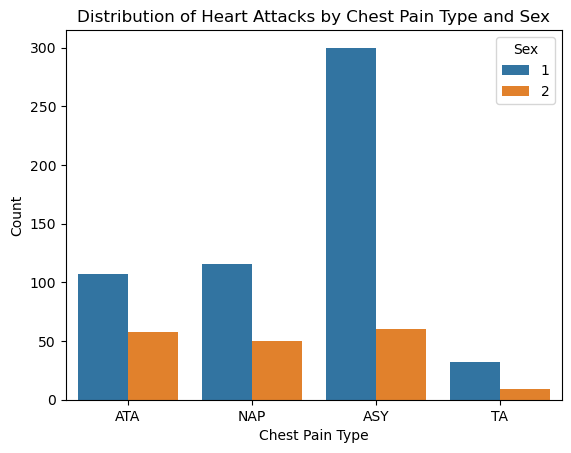

In [56]:
# so now let us draw some of the final conclusions such that 

# is that the females (or) males who are affected by the heart attack

sns.countplot(x='ChestPainType', hue='Sex', data=var)
plt.title('Distribution of Heart Attacks by Chest Pain Type and Sex')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()


# so here we can see that the heart attacks caused by the chestpains for different catogerires 